# ML-based Heart Failure Prediction
## ปัญหาหลักของโรคหลอดเลือดหัวใจ (CVD)
1. อัตราการเสียชีวิตสูง: CVD เป็นสาเหตุการตายอันดับ 1 ของโลก คร่าชีวิตผู้คนประมาณ 17.9 ล้านคนต่อปี
2. การเสียชีวิตก่อนวัยอันควร: 1 ใน 3 ของผู้เสียชีวิตจาก CVD มีอายุต่ำกว่า 70 ปี
3. ความซับซ้อนในการวินิจฉัย: CVD มีปัจจัยเสี่ยงและอาการหลากหลาย ทำให้ยากต่อการวินิจฉัยในระยะเริ่มต้น
4. ความจำเป็นในการจัดการเชิงรุก: ผู้ที่มีความเสี่ยงสูงต้องได้รับการตรวจพบและจัดการตั้งแต่ระยะแรก

## Machine Learning สามารถช่วยแก้ปัญหาเหล่านี้ได้ดังนี้
1. การทำนายความเสี่ยง: โมเดล ML สามารถวิเคราะห์ปัจจัยเสี่ยง 11 ประการที่กล่าวถึง เพื่อคาดการณ์โอกาสการเกิดโรคหัวใจได้อย่างแม่นยำ
2. ML ช่วยระบุผู้ที่มีความเสี่ยงสูงได้เร็วขึ้น ทำให้สามารถเริ่มการรักษาหรือป้องกันได้ทันท่วงที
3. โมเดล ML สามารถช่วยแพทย์ในการวินิจฉัยที่แม่นยำขึ้น โดยเฉพาะในกรณีที่มีอาการไม่ชัดเจน

___

##  task, experience, and performance measurement (T/E/P) 
#### 1. Task(T): ทำนายโอกาสการเกิดโรคหัวใจจากข้อมูลทางการแพทย์
#### 2. Experience(E): ชุดข้อมูลผู้ป่วยที่มีคุณลักษณะทางคลินิกและผลลัพธ์ที่ทราบแล้ว
#### 3. Performance Measurement(P): วัดประสิทธิภาพของโมเดลจากค่า Accuracy, Precision, Recall, F1-score, ROC-AUC

___

## dataset source: [Heart Failure Prediction Dataset]
[Heart Failure Prediction Dataset]: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data



### Attribute Information
1. **Age:**  Age of the patient
2. **Sex:**  sex of the patient [M: Male, F: Female]
3. **ChestPainType:**  chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. **RestingBP:**  resting blood pressure [mm Hg]
5. **Cholesterol:**  serum cholesterol [mm/dl]
6. **FastingBS:**  fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. **RestingECG:**  resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. **MaxHR:**  maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. **Oldpeak:**  oldpeak = ST [Numeric value measured in depression]
11. **ST_Slope:**  the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. **HeartDisease:**  output class [1: heart disease, 0: Normal]

## Data Preprocessing
___

> ### 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('heart.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'heart.csv'

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [57]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [58]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

#### Outlier Handling

In [59]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

In [1]:
# List of numerical columns to check for outliers
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df[col], ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Boxplot of {col}')

# Detecting outliers in each column
outliers_dict = {}
for col in numerical_columns:
    outliers_dict[col] = detect_outliers_iqr(df, col)

# Displaying the number of outliers detected in each column
outliers_count = {col: len(outliers_dict[col]) for col in numerical_columns}
print(outliers_count)
# Hide the empty subplot
axes[1, 2].axis('off')

# Display the plots
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

#### Categorical Data Handling

In [61]:
from sklearn.preprocessing import LabelEncoder
# Copy original data for label encoding
data_label_encoded = df.copy()

# Columns to apply label encoding
label_encoder = LabelEncoder()
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Apply label encoding
for column in categorical_columns:
    data_label_encoded[column] = label_encoder.fit_transform(data_label_encoded[column])

# Show the processed data
data_label_encoded.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


#### Feature Scaling

In [64]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))

# Apply MinMaxScaler
scaled_data = sc.fit_transform(data_label_encoded)

# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=data_label_encoded.columns)

# Save the DataFrame to a CSV file
df_scaled.to_csv('heart_preprocessing.csv', index=False)

## Data Splitting

### K fold Cross Validation

In [68]:
from sklearn.model_selection import KFold
df = pd.read_csv('heart_preprocessing.csv')

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

n_splits = 5

kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

df.head(),X,y

(        Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
 0  0.244898  1.0       0.333333       0.70     0.479270        0.0   
 1  0.428571  0.0       0.666667       0.80     0.298507        0.0   
 2  0.183673  1.0       0.333333       0.65     0.469320        0.0   
 3  0.408163  0.0       0.000000       0.69     0.354892        0.0   
 4  0.530612  1.0       0.666667       0.75     0.323383        0.0   
 
    RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
 0         0.5  0.788732             0.0  0.295455       1.0           0.0  
 1         0.5  0.676056             0.0  0.409091       0.5           1.0  
 2         1.0  0.267606             0.0  0.295455       1.0           0.0  
 3         0.5  0.338028             1.0  0.465909       0.5           1.0  
 4         0.5  0.436620             0.0  0.295455       1.0           0.0  ,
           Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
 0    0.244898  1.0       0.333333  

## Model Selection
### 1. Logistic Regression

==================== Logistic Regression ====================
Model : Logistic Regression
Fold 1


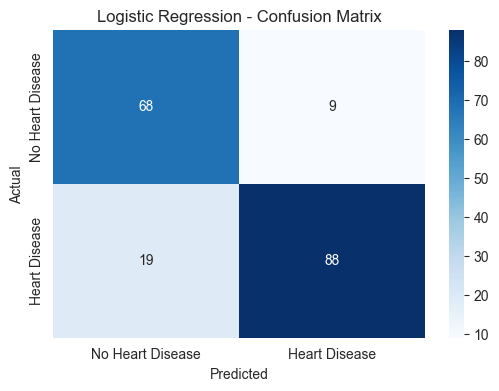

+-----------+-------+
|  Metric   | Score |
+-----------+-------+
| Accuracy  | 0.85  |
| Precision | 0.91  |
|  Recall   | 0.82  |
| F1-score  | 0.86  |
|  ROC-AUC  | 0.90  |
+-----------+-------+

Fold 2


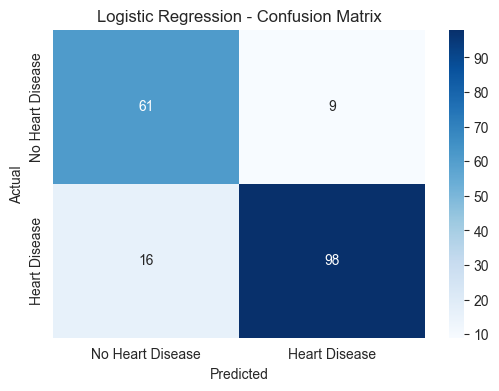

+-----------+-------+
|  Metric   | Score |
+-----------+-------+
| Accuracy  | 0.86  |
| Precision | 0.92  |
|  Recall   | 0.86  |
| F1-score  | 0.89  |
|  ROC-AUC  | 0.94  |
+-----------+-------+

Fold 3


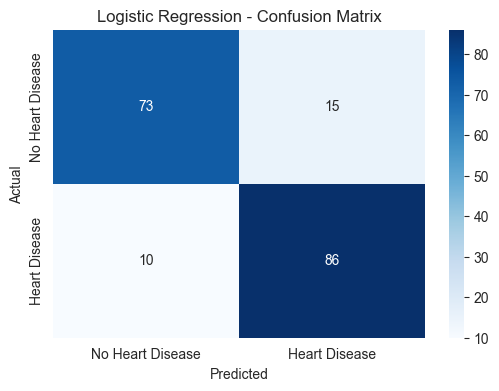

+-----------+-------+
|  Metric   | Score |
+-----------+-------+
| Accuracy  | 0.86  |
| Precision | 0.85  |
|  Recall   | 0.90  |
| F1-score  | 0.87  |
|  ROC-AUC  | 0.94  |
+-----------+-------+

Fold 4


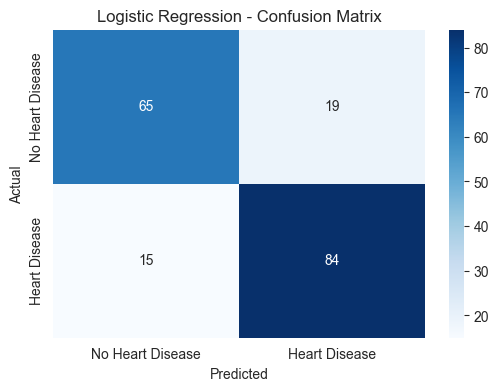

+-----------+-------+
|  Metric   | Score |
+-----------+-------+
| Accuracy  | 0.81  |
| Precision | 0.82  |
|  Recall   | 0.85  |
| F1-score  | 0.83  |
|  ROC-AUC  | 0.87  |
+-----------+-------+

Fold 5


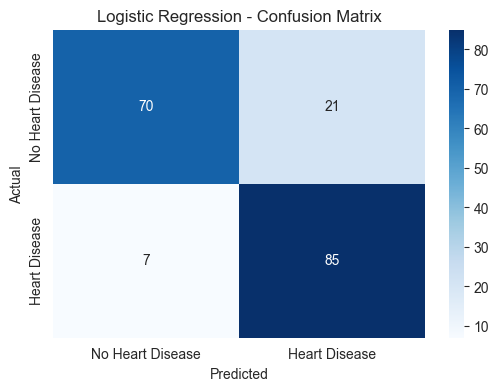

+-----------+-------+
|  Metric   | Score |
+-----------+-------+
| Accuracy  | 0.85  |
| Precision | 0.80  |
|  Recall   | 0.92  |
| F1-score  | 0.86  |
|  ROC-AUC  | 0.92  |
+-----------+-------+

==================== Random Forest ====================
Model : Random Forest
Fold 1


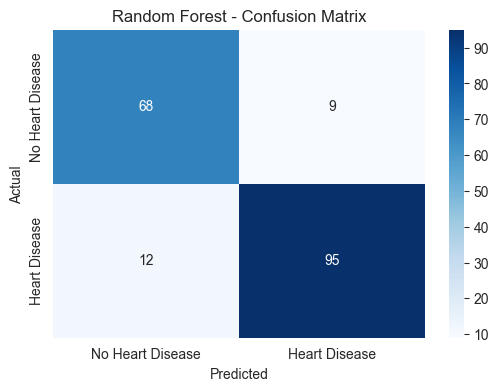

+-----------+-------+
|  Metric   | Score |
+-----------+-------+
| Accuracy  | 0.89  |
| Precision | 0.91  |
|  Recall   | 0.89  |
| F1-score  | 0.90  |
|  ROC-AUC  | 0.94  |
+-----------+-------+

Fold 2


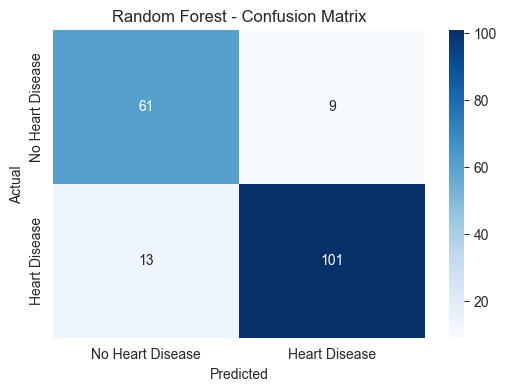

+-----------+-------+
|  Metric   | Score |
+-----------+-------+
| Accuracy  | 0.88  |
| Precision | 0.92  |
|  Recall   | 0.89  |
| F1-score  | 0.90  |
|  ROC-AUC  | 0.95  |
+-----------+-------+

Fold 3


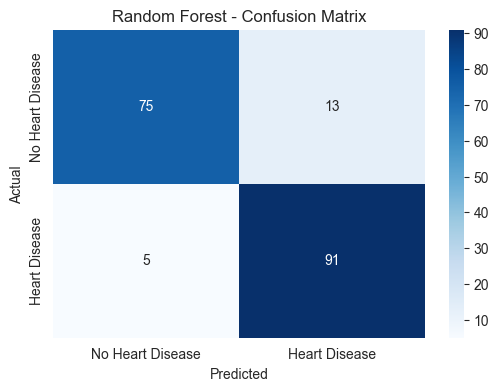

+-----------+-------+
|  Metric   | Score |
+-----------+-------+
| Accuracy  | 0.90  |
| Precision | 0.88  |
|  Recall   | 0.95  |
| F1-score  | 0.91  |
|  ROC-AUC  | 0.95  |
+-----------+-------+

Fold 4


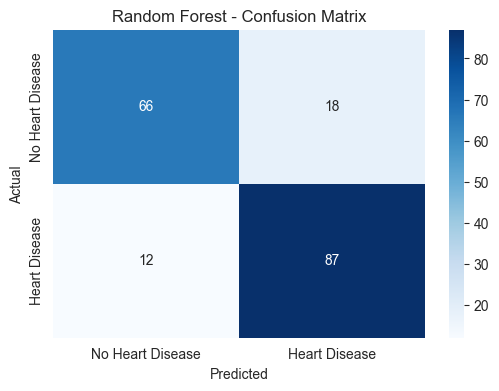

+-----------+-------+
|  Metric   | Score |
+-----------+-------+
| Accuracy  | 0.84  |
| Precision | 0.83  |
|  Recall   | 0.88  |
| F1-score  | 0.85  |
|  ROC-AUC  | 0.89  |
+-----------+-------+

Fold 5


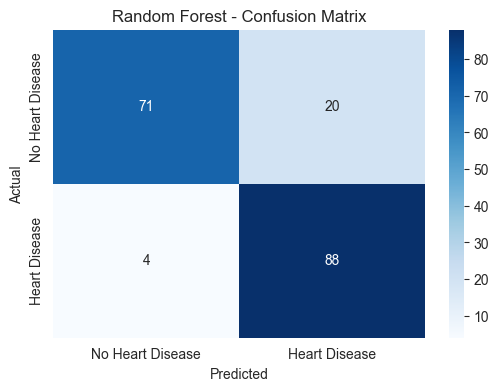

+-----------+-------+
|  Metric   | Score |
+-----------+-------+
| Accuracy  | 0.87  |
| Precision | 0.81  |
|  Recall   | 0.96  |
| F1-score  | 0.88  |
|  ROC-AUC  | 0.93  |
+-----------+-------+

==================== Support Vector Machine ====================
Model : Support Vector Machine
Fold 1


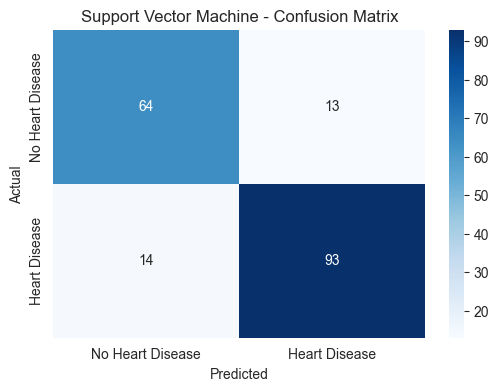

+-----------+-------+
|  Metric   | Score |
+-----------+-------+
| Accuracy  | 0.85  |
| Precision | 0.88  |
|  Recall   | 0.87  |
| F1-score  | 0.87  |
|  ROC-AUC  | 0.92  |
+-----------+-------+

Fold 2


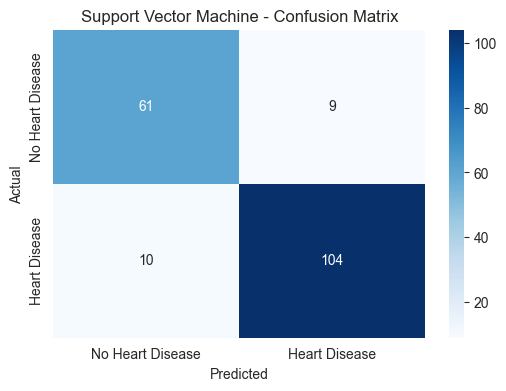

+-----------+-------+
|  Metric   | Score |
+-----------+-------+
| Accuracy  | 0.90  |
| Precision | 0.92  |
|  Recall   | 0.91  |
| F1-score  | 0.92  |
|  ROC-AUC  | 0.93  |
+-----------+-------+

Fold 3


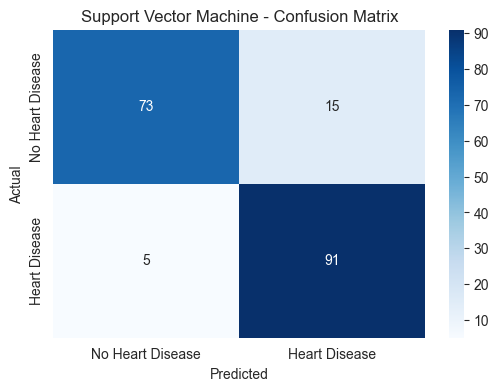

+-----------+-------+
|  Metric   | Score |
+-----------+-------+
| Accuracy  | 0.89  |
| Precision | 0.86  |
|  Recall   | 0.95  |
| F1-score  | 0.90  |
|  ROC-AUC  | 0.93  |
+-----------+-------+

Fold 4


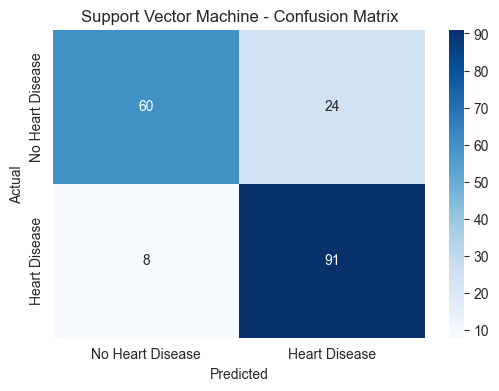

+-----------+-------+
|  Metric   | Score |
+-----------+-------+
| Accuracy  | 0.83  |
| Precision | 0.79  |
|  Recall   | 0.92  |
| F1-score  | 0.85  |
|  ROC-AUC  | 0.88  |
+-----------+-------+

Fold 5


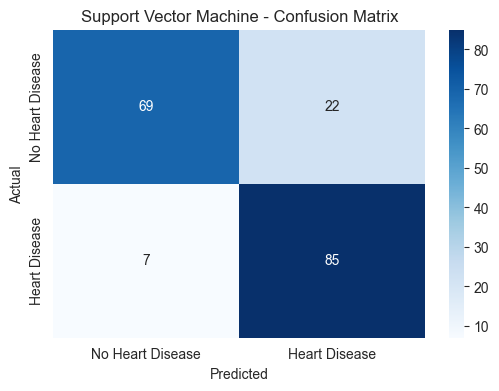

+-----------+-------+
|  Metric   | Score |
+-----------+-------+
| Accuracy  | 0.84  |
| Precision | 0.79  |
|  Recall   | 0.92  |
| F1-score  | 0.85  |
|  ROC-AUC  | 0.93  |
+-----------+-------+



In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GrinSearchCV
# Import necessary libraries
from tabulate import tabulate

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True)
}

for name, clf in classifiers.items():
    fold = 0
    print(f'==================== {name} ====================')
    print(f'Model : {name}')
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_pred_proba = clf.predict_proba(X_test)[:, 1]
        
        cm = confusion_matrix(y_test, y_pred)
        
        print(f'Fold {fold + 1}')

        # Plot confusion matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
        plt.title(f'{name} - Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        
        metrics = [
            ["Accuracy", f"{accuracy:.2f}"],
            ["Precision", f"{precision:.2f}"],
            ["Recall", f"{recall:.2f}"],
            ["F1-score", f"{f1:.2f}"],
            ["ROC-AUC", f"{roc_auc:.2f}"]
        ]
        
        # Print the metrics in a tabulated format
        print(tabulate(metrics, headers=["Metric", "Score"], tablefmt="pretty"))
        print()
        fold += 1